In [1]:
# Finding an optimal setup for longitudinal resolution
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import sys
sys.path.insert(0, "../../python")
from plotting import makefig
import eo_signal as eos
import currents as cp

In [2]:
def compute_peaks(y0, tp, angle, r0):
    
    I_drive = np.zeros(10)
    I_wit   = np.zeros(10)
    S_drive = np.zeros(10)
    S_wit   = np.zeros(10)
    for i in range(10):
        I, ti, sig, t_sig, gamma, t_gamma = eos.get_signal(i, "GaP", 100e-6, y0, tp, 15, r0, "cross")

        dt     = 0.4e-12
        I_ind1 = np.argmin(abs(ti))
        I_ind2 = np.argmin(abs(ti - dt))

        S_ind1  = np.argmin(abs(t_sig))
        S_ind2  = np.argmin(abs(t_sig - dt))


        I_width = I_ind2 - I_ind1
        S_width = S_ind2 - S_ind1

        I_min   = max(I) / 10
        S_min   = max(sig) / 10

        I_locs, I_peaks = find_peaks(I, distance = I_width, height = I_min)
        S_locs, S_peaks = find_peaks(sig, distance = S_width, height = S_min)
        
        I_drive[i] = I_peaks["peak_heights"][0]
        I_wit[i]   = I_peaks["peak_heights"][1]
        
        S_drive[i] = S_peaks["peak_heights"][0]
        S_wit[i]   = S_peaks["peak_heights"][1]
    return I_drive, I_wit, S_drive, S_wit

In [3]:
y0     = 800e-9
tp     = 30e-15
angle  = 60
r0     = 1e-3

In [4]:
Id15, Iw15, Sd15, Sw15 = compute_peaks(y0, tp, 15, r0)

In [8]:
d_ind = np.argsort(Id15)
w_ind = np.argsort(Iw15)

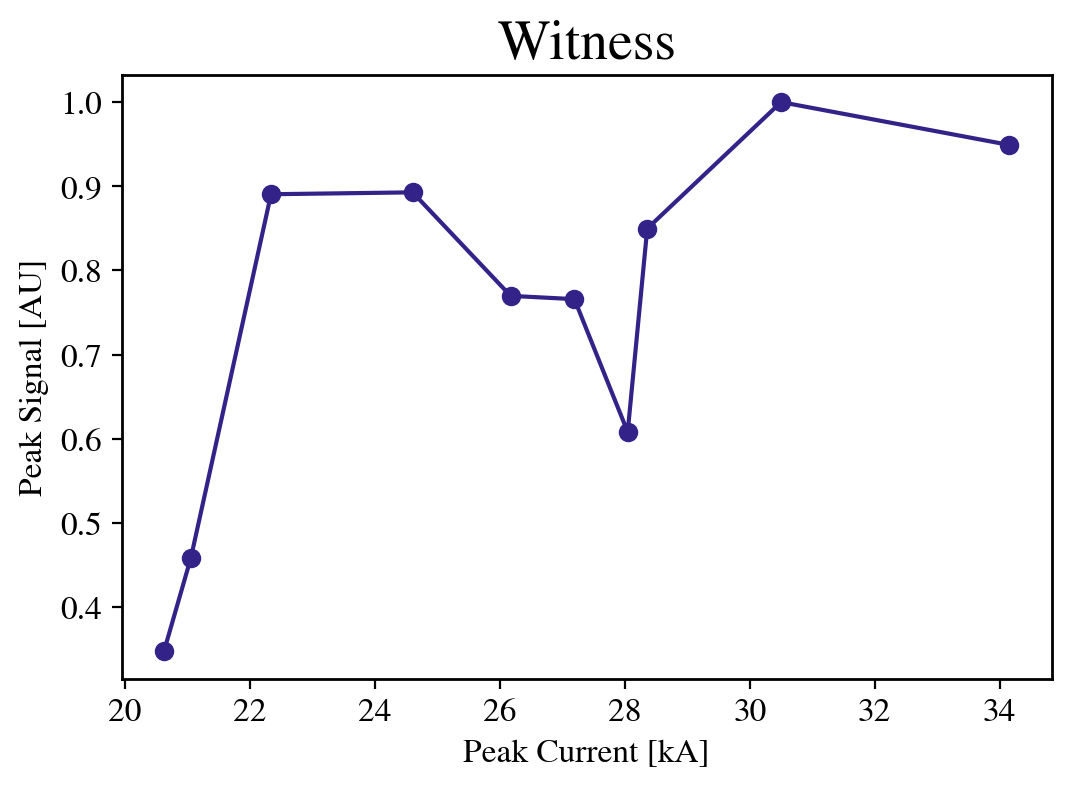

In [14]:
fig, ax = makefig(xlab = "Peak Current [kA]", ylab = "Peak Signal [AU]")
#ax.plot(Id15[d_ind], Sd15[d_ind] / max(Sd15), '-o', label = 'Drive')
ax.plot(Iw15[w_ind], Sw15[w_ind] / max(Sw15), '-o', label = "Witness")
#ax.legend()
ax.set_title("Witness")
plt.show()